In [5]:
import pandas as pd
#pd.__version__""

In [7]:
df = pd.read_csv('E:\ML PRACTISE\HRcommasep\HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


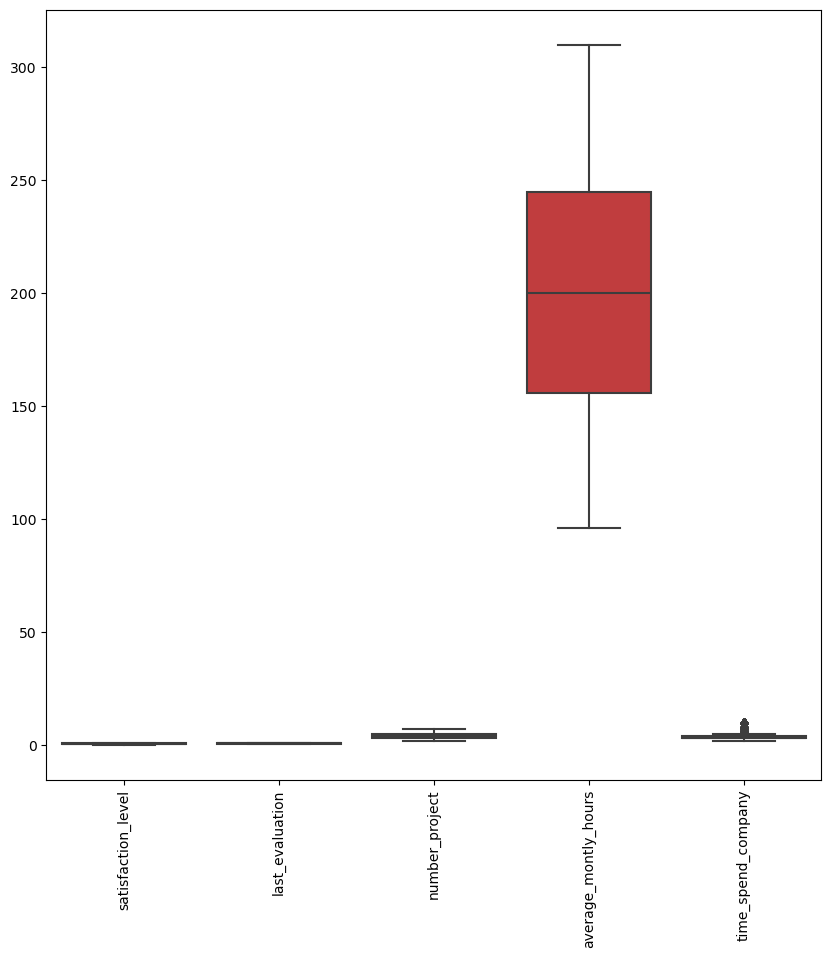

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots to check for outliers
plt.figure(figsize=(10, 10))
sns.boxplot(data=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])
plt.xticks(rotation=90)
plt.show()


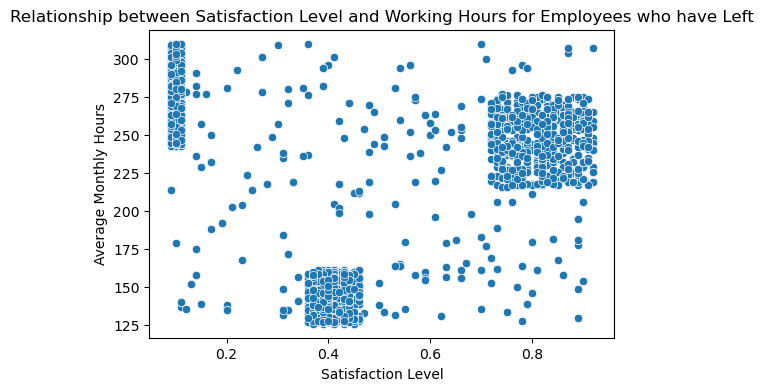

In [14]:


# Task 2: Relationship between satisfaction level and working hours of employees who have left the organization
left_employees = df[df['left'] == 1]  # Filter employees who have left the organization

# Scatter plot to visualize the relationship between satisfaction level and working hours
plt.figure(figsize=(6, 4))
sns.scatterplot(x='satisfaction_level', y='average_montly_hours', data=left_employees)
plt.title('Relationship between Satisfaction Level and Working Hours for Employees who have Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

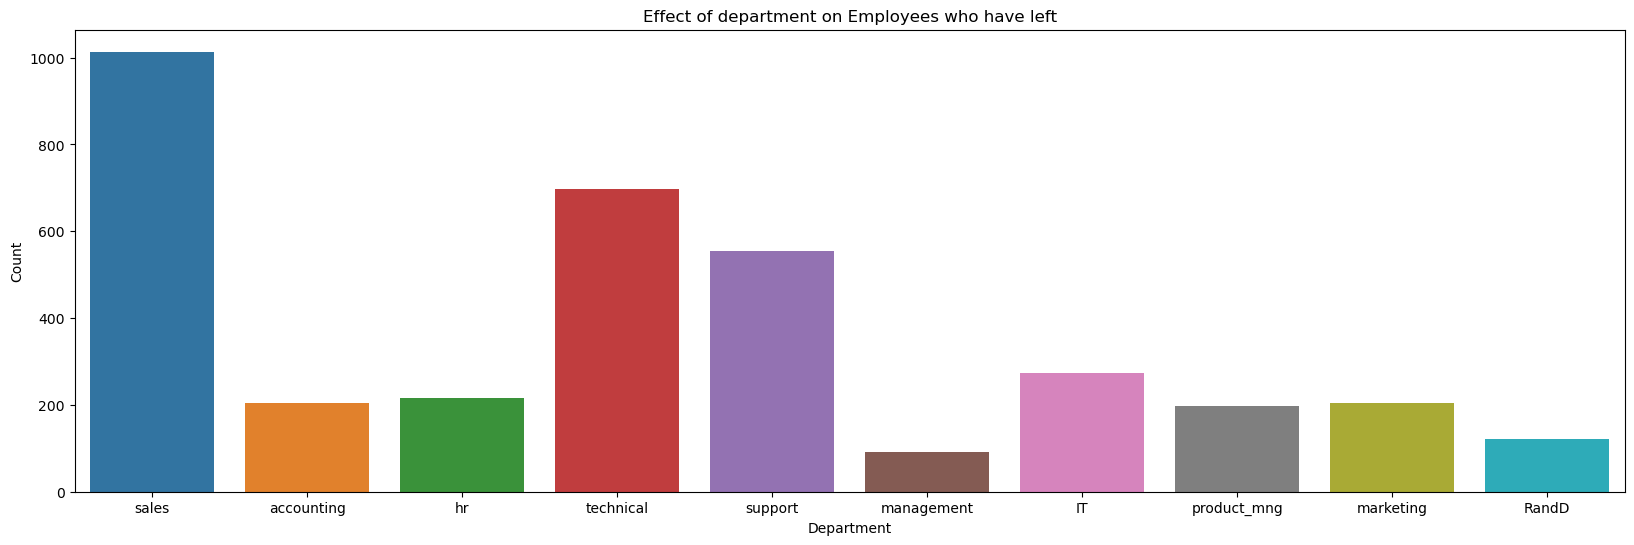

In [16]:
#bar plat to see effect of department on employees who have left
plt.figure(figsize=(20,6))
sns.countplot(x='Department', data = left_employees)
plt.title('Effect of department on Employees who have left')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show

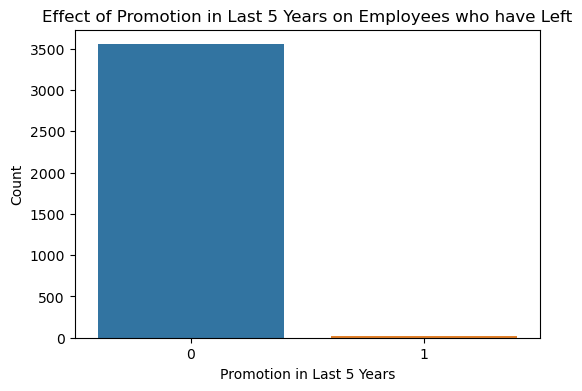

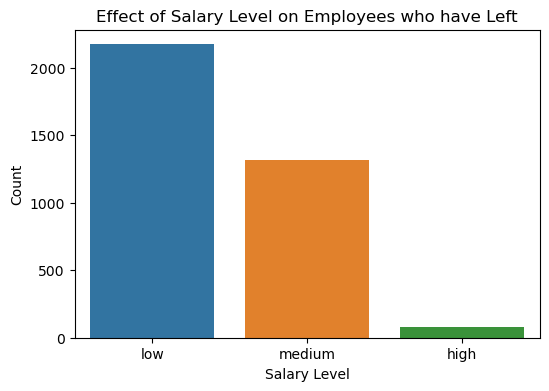

In [17]:
# Create a bar plot to visualize the effect of promotion in the last 5 years on employees who have left
plt.figure(figsize=(6, 4))
sns.countplot(x='promotion_last_5years', data=left_employees)
plt.title('Effect of Promotion in Last 5 Years on Employees who have Left')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Count')
plt.show()

# Create a bar plot to visualize the effect of salary level on employees who have left
plt.figure(figsize=(6, 4))
sns.countplot(x='salary', data=left_employees)
plt.title('Effect of Salary Level on Employees who have Left')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X  = df.drop('left', axis=1)
Y =  df['left'] #target varible

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include = ['int64','float64']).columns
numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num',numerical_transformer,numerical_features),('cat',categorical_transformer,categorical_features)])

model = Pipeline(steps = [('preprocessor',preprocessor),('classifier',RandomForestClassifier(random_state = 42))])
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('ACCURACY',accuracy_score(y_test,y_pred))
print('\n Classification Report', classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


ACCURACY 0.988

 Classification Report               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

[[2284   10]
 [  26  680]]


In [ ]:
import pandas as pd
import numpy as np

# Define the number of samples for the synthetic test dataset
num_samples = 1000

# Generate synthetic data
synthetic_data = {
    'satisfaction_level': np.random.uniform(0, 1, num_samples),
    'last_evaluation': np.random.uniform(0, 1, num_samples),
    'number_project': np.random.randint(2, 7, num_samples),
    'average_montly_hours': np.random.randint(100, 300, num_samples),
    'time_spend_company': np.random.randint(3, 11, num_samples),
    'Work_accident': np.random.randint(0, 2, num_samples),
    'left': np.random.randint(0, 2, num_samples),
    'promotion_last_5years': np.random.randint(0, 2, num_samples),
    'Department': np.random.choice(['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD'], num_samples),
    'salary': np.random.choice(['low', 'medium', 'high'], num_samples)
}

# Create DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Display the first few rows of the synthetic dataset
print(synthetic_df.head())

# Save the synthetic data to a CSV file (optional)
synthetic_df.to_csv('synthetic_test_data.csv', index=False)


In [44]:
# # Load the synthetic test dataset
synthetic_df = pd.read_csv('synthetic_test_data.csv')

# Define features and target variable
X_synthetic = synthetic_df.drop('left', axis=1)  # Features
y_synthetic = synthetic_df['left']  # Target variable


#x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

numericalS_features = X_synthetic.select_dtypes(include = ['int64','float64']).columns
numericalS_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

categoricalS_features = X_synthetic.select_dtypes(include=['object']).columns
categoricalS_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numericalS_transformer, numericalS_features), ('cat', categoricalS_transformer, categoricalS_features)])





# # Make predictions on the synthetic test dataset
y_pred_synthetic = model.predict(X_synthetic)

# Evaluate the model on the synthetic test dataset

print('ACCURACY',accuracy_score(y_synthetic, y_pred_synthetic))
print('\n Classification Report', classification_report(y_synthetic, y_pred_synthetic))
print(confusion_matrix(y_synthetic, y_pred_synthetic))






ACCURACY 0.501

 Classification Report               precision    recall  f1-score   support

           0       0.50      0.94      0.66       504
           1       0.47      0.05      0.09       496

    accuracy                           0.50      1000
   macro avg       0.49      0.50      0.37      1000
weighted avg       0.49      0.50      0.38      1000

[[476  28]
 [471  25]]
